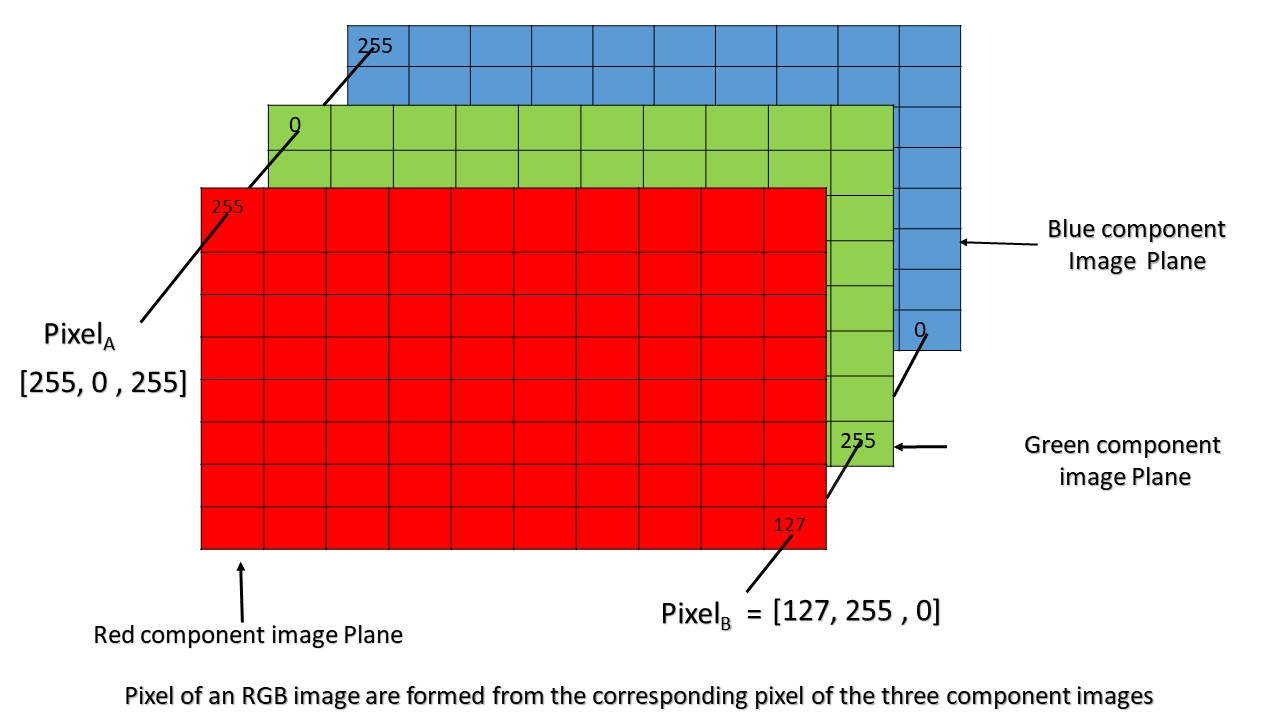

In [1]:
# The Image class is a part of the IPython library that allows you to embed images, HTML, audio, and other media types directly 
# into the output of the notebook. 
# In this case, it's displaying an image file named 'rgb.jpg' with a width of 500 pixels.

from IPython.display import Image
Image(filename='rgb.jpg' ,width=500)

In [2]:
import numpy as np                   #Numpy for all the computations
import matplotlib.pyplot as plt      #Matplotlib to display the images
%matplotlib inline

In [3]:
photo_data = plt.imread('Milky_way.jpg')  #Command to read images
# plt.imread: This is a function from the Matplotlib library that reads an image file 
# and returns its pixel data as a NumPy array.
photo_data

array([[[26, 17, 18],
        [21, 12, 13],
        [20, 11, 12],
        ...,
        [37, 25, 25],
        [38, 26, 26],
        [37, 25, 25]],

       [[31, 22, 23],
        [26, 17, 18],
        [24, 15, 16],
        ...,
        [36, 24, 24],
        [36, 24, 24],
        [34, 22, 22]],

       [[26, 17, 18],
        [24, 15, 16],
        [24, 15, 16],
        ...,
        [35, 23, 23],
        [34, 22, 22],
        [32, 20, 20]],

       ...,

       [[55, 44, 42],
        [56, 45, 43],
        [53, 42, 40],
        ...,
        [33, 22, 20],
        [33, 22, 20],
        [33, 22, 20]],

       [[59, 48, 46],
        [53, 42, 40],
        [49, 38, 36],
        ...,
        [34, 23, 21],
        [35, 24, 22],
        [35, 24, 22]],

       [[61, 50, 48],
        [50, 39, 37],
        [48, 37, 35],
        ...,
        [35, 24, 22],
        [36, 25, 23],
        [36, 25, 23]]], dtype=uint8)

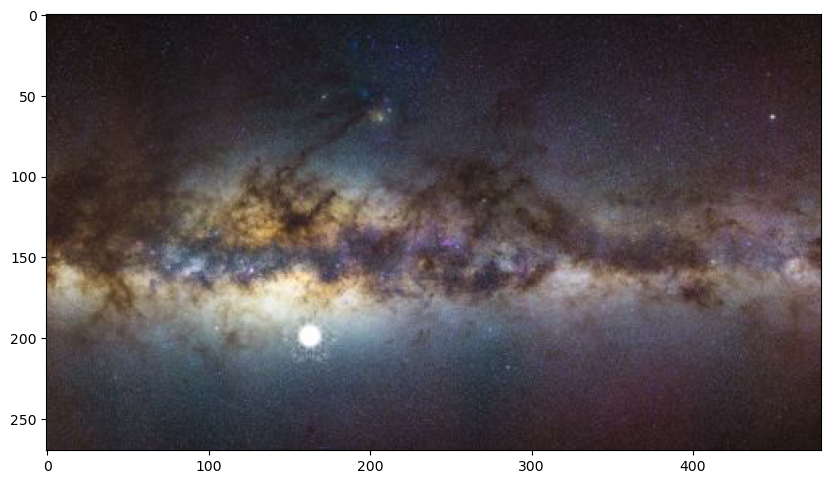

In [4]:
plt.figure(figsize=(10,10)) #Sets the size of the figure displayed
plt.imshow(photo_data);     #Command to display images

In [5]:
photo_data.size    #Total Number of elements in array (Not number of pixels)

388800

In [6]:
photo_data.shape

(270, 480, 3)

In [7]:
photo_data.min(),photo_data.max()   

(10, 255)

In [8]:
# type(photo_data)
x, y, z = photo_data.shape
print(x, y, z, sep = ' ')

270 480 3


In [9]:
rgb = []

top_left = photo_data[0, 0]
# top_left
rgb.append(top_left.tolist())

top_right = photo_data[0, y-1]
#top_right
rgb.append(top_right.tolist())

bottom_left = photo_data[x-1, 0]
#bottom_left
rgb.append(bottom_left.tolist())

bottom_right = photo_data[x-1, y-1]
#bottom_right
rgb.append(bottom_right.tolist())

print(rgb)

[[26, 17, 18], [37, 25, 25], [61, 50, 48], [36, 25, 23]]


In [10]:
red_tl_tr_bl_br = []
green_tl_tr_bl_br = []
blue_tl_tr_bl_br = []

for r, g, b in rgb:
    red_tl_tr_bl_br.append(r)
    green_tl_tr_bl_br.append(g)
    blue_tl_tr_bl_br.append(b)

print(red_tl_tr_bl_br)
print(green_tl_tr_bl_br)
print(blue_tl_tr_bl_br)

[26, 37, 61, 36]
[17, 25, 50, 25]
[18, 25, 48, 23]


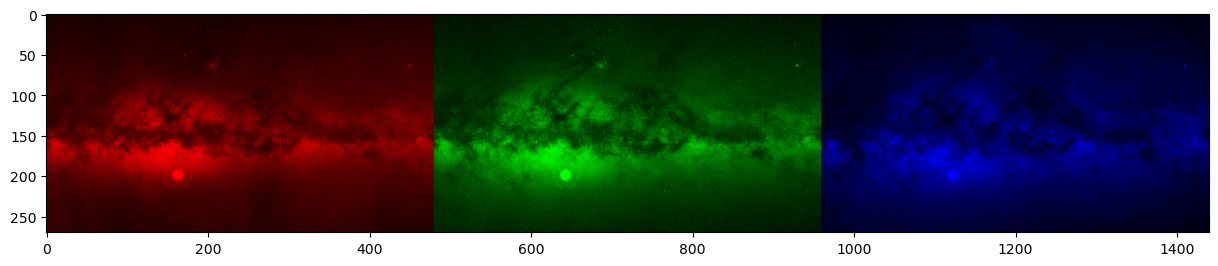

In [11]:
img_R, img_G, img_B = photo_data.copy(), photo_data.copy(), photo_data.copy()  #Creating 3 copies
img_R[:, :, (1, 2)] = 0   #Setting the blue and green channels to 0
img_G[:, :, (0, 2)] = 0   #Setting the red and blue channels to 0
img_B[:, :, (0, 1)] = 0   #Setting the red and green channels to 0

img_rgb = np.concatenate((img_R,img_G,img_B), axis=1)   #Concatenating the images to view them at once
#print(img_rgb)
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)

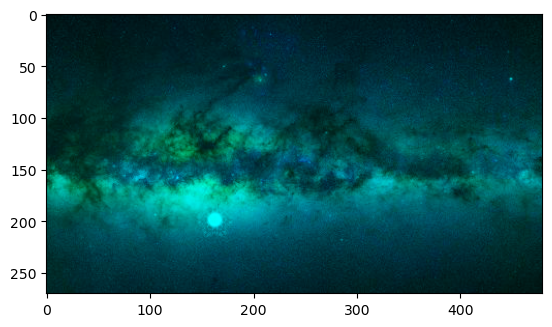

In [12]:
img_gb = photo_data.copy()
img_gb[:,:,(0)] = 0

plt.imshow(img_gb)

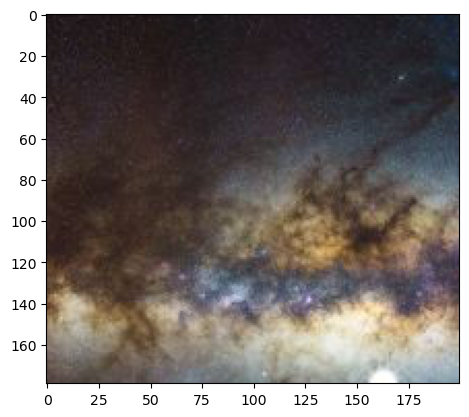

In [13]:
crop_img = photo_data[20:199,:200,:]     
imgplot = plt.imshow(crop_img)

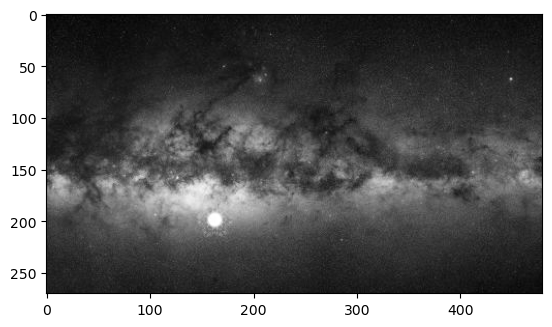

In [14]:
grayscale_image = photo_data.mean(axis = 2)     #Computing the mean across the channel axis
imgplot = plt.imshow(grayscale_image , cmap = "gray")  

In [15]:
grayscale_image # Note: The data became single channeled.

array([[20.33333333, 15.33333333, 14.33333333, ..., 29.        ,
        30.        , 29.        ],
       [25.33333333, 20.33333333, 18.33333333, ..., 28.        ,
        28.        , 26.        ],
       [20.33333333, 18.33333333, 18.33333333, ..., 27.        ,
        26.        , 24.        ],
       ...,
       [47.        , 48.        , 45.        , ..., 25.        ,
        25.        , 25.        ],
       [51.        , 45.        , 41.        , ..., 26.        ,
        27.        , 27.        ],
       [53.        , 42.        , 40.        , ..., 27.        ,
        28.        , 28.        ]])

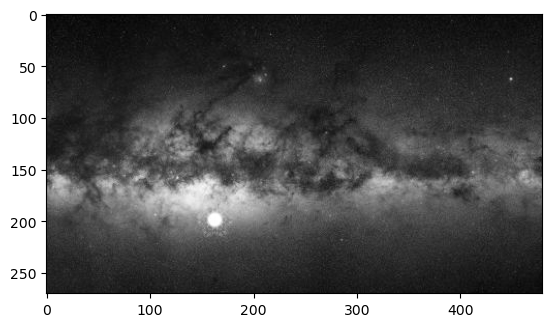

In [16]:
rgb_weights = [0.2989, 0.5870, 0.1140]                #Mean weights of the rgb channels
grayscale_image = np.dot(photo_data, rgb_weights)     #Dot product
imgplot = plt.imshow(grayscale_image, cmap="gray")                #cmap = "gray"

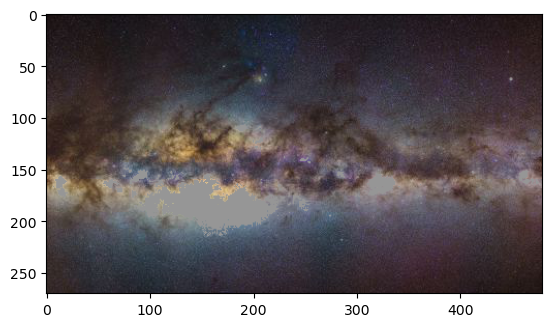

In [17]:
img_150 = (photo_data[:,:,2] > 150)      #Boolean array having true false values based on the condition
img=photo_data.copy()
img[img_150]=150                         #Clipping the value to a 150 where the img_150 is true
plt.imshow(img)

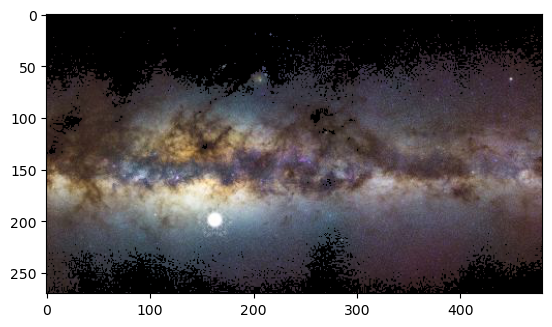

In [18]:
img_r50 = (photo_data[:,:,0] < 50)
img_data = photo_data.copy()
img_data[img_r50] = 0
plt.imshow(img_data)

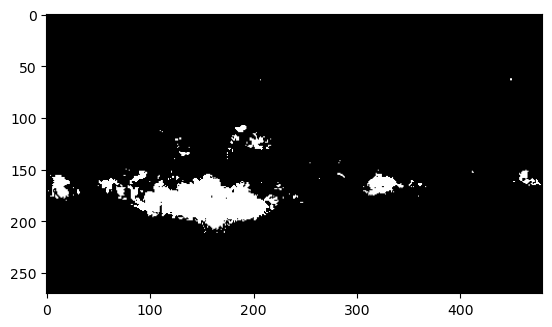

In [19]:
img_gray = photo_data.mean(axis = 2)
# plt.imshow(img_gray, cmap = "gray")
img_150g1 = (img_gray[:, :] < 150)
img_150g2 = (img_gray[:, :] >= 150)
img_bw = photo_data.copy()
img_bw[img_150g1] = 0
img_bw[img_150g2] = 255

plt.imshow(img_bw)

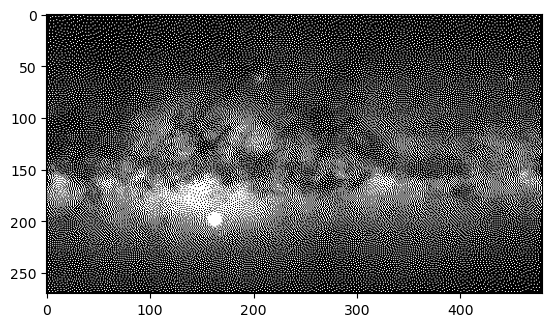

In [20]:
def floyd_steinberg(im_gs):
    """ 
      Implements the Floyd steinberg algorithm to create binary image from grayscale image 
    """
    thres = 255//2
    im_temp = im_gs.copy()
    for row in range(0,im_gs.shape[0]-1):
        for col in range(1,im_gs.shape[1]-1):
            old = im_temp[row, col]
            if im_temp[row, col] > thres:
                im_temp[row, col] = 255
            else:
                im_temp[row, col] = 0

            quant_error = old - im_temp[row, col]
            im_temp[row, col+1] = im_temp[row, col+1] + quant_error * 7 /16
            im_temp[row+1, col-1] = im_temp[row+1, col-1] + quant_error * 3 /16
            im_temp[row+1, col] = im_temp[row+1, col] + quant_error * 5 /16
            im_temp[row+1, col+1] = im_temp[row+1, col+1] + quant_error * 1 /16

    im_temp[im_temp<thres] = 0
    im_temp[im_temp>=thres] = 255

    return im_temp


final_img = floyd_steinberg(img_gray) 
plt.imshow(final_img, cmap = 'gray')